In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from rdkit import Chem
from rdkit.Chem import PandasTools

In [2]:
all_docked = pd.read_excel('../Data/Colchicine - AI, MD.xlsx')

In [3]:
all_docked.head()

,Index,Structure,SMILES,SYBA score,A549 [nM],BALB/3T3 [nM],LoVo [nM],LoVo/DX [nM],MCF-7 [nM],RI LoVo,SI BALB3/T3 (A549),SI BALB3/T3 (LoVo),SI BALB3/T3 (LoVo/DX),SI BALB3/T3 (MCF-7),Affinity to 1SA0 [kcal/mol]
0,1,NaN,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,45.88,8.348220,10.933929,6.176982,94.278083,8.357629,15.26,1.31,1.77,0.12,1.31,-7.8
1,2,NaN,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,68.25,13.578222,11.636406,13.612706,33.064228,10.167834,2.43,0.86,0.85,0.35,1.14,-7.6
2,3,NaN,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,74.22,16.404839,39.119200,41.777761,24.143942,9.099151,0.58,2.38,0.94,1.62,4.30,-8.4
3,4,NaN,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,40.43,18.107777,27.000988,9.635175,232.135864,5.400000,24.09,1.49,2.80,0.12,5.00,-8.2
4,5,NaN,O=CC1=CN=NN1[C@H1]2CCC3=CC(OC)=C(OC)C(OC)=C3C4...,41.84,6.445819,10.817093,8.763690,1553.892060,12.029326,177.31,1.68,1.23,0.01,0.90,-8.1


In [4]:
all_docked.rename(columns={'Index': 'ligand number'}, inplace=True)
all_docked.head()

,ligand number,Structure,SMILES,SYBA score,A549 [nM],BALB/3T3 [nM],LoVo [nM],LoVo/DX [nM],MCF-7 [nM],RI LoVo,SI BALB3/T3 (A549),SI BALB3/T3 (LoVo),SI BALB3/T3 (LoVo/DX),SI BALB3/T3 (MCF-7),Affinity to 1SA0 [kcal/mol]
0,1,NaN,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,45.88,8.348220,10.933929,6.176982,94.278083,8.357629,15.26,1.31,1.77,0.12,1.31,-7.8
1,2,NaN,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,68.25,13.578222,11.636406,13.612706,33.064228,10.167834,2.43,0.86,0.85,0.35,1.14,-7.6
2,3,NaN,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,74.22,16.404839,39.119200,41.777761,24.143942,9.099151,0.58,2.38,0.94,1.62,4.30,-8.4
3,4,NaN,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,40.43,18.107777,27.000988,9.635175,232.135864,5.400000,24.09,1.49,2.80,0.12,5.00,-8.2
4,5,NaN,O=CC1=CN=NN1[C@H1]2CCC3=CC(OC)=C(OC)C(OC)=C3C4...,41.84,6.445819,10.817093,8.763690,1553.892060,12.029326,177.31,1.68,1.23,0.01,0.90,-8.1


In [5]:
chirality_selection = pd.read_excel('../Data/new_structures_S_chirality.xlsx')

In [6]:
chirality_selection.head()

,Unnamed: 0,Unnamed: 0.1,SMILES,SYBA score,A549 [nM],BALB/3T3 [nM],LoVo [nM],LoVo/DX [nM],MCF-7 [nM],atom_num,chirality
0,0,NaN,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,45.88,10.168579,6.200000,5.700000,136.586050,8.357629,14,S
1,1,NaN,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,68.25,10.648944,9.439809,17.460496,49.797629,10.167834,14,S
2,2,NaN,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,74.22,11.794066,30.305940,54.000000,37.606395,9.099151,14,S
3,3,NaN,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,40.43,6.400000,23.752895,8.570105,210.367783,5.400000,14,S
4,4,NaN,O=CC1=CN=NN1[C@H1]2CCC3=CC(OC)=C(OC)C(OC)=C3C4...,41.84,4.774935,11.772850,10.000000,1806.439871,12.029326,7,S


In [7]:
chirality_selection.rename(columns={'Unnamed: 0': 'ligand number'}, inplace=True)
chirality_selection.head()

,ligand number,Unnamed: 0.1,SMILES,SYBA score,A549 [nM],BALB/3T3 [nM],LoVo [nM],LoVo/DX [nM],MCF-7 [nM],atom_num,chirality
0,0,NaN,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,45.88,10.168579,6.200000,5.700000,136.586050,8.357629,14,S
1,1,NaN,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,68.25,10.648944,9.439809,17.460496,49.797629,10.167834,14,S
2,2,NaN,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,74.22,11.794066,30.305940,54.000000,37.606395,9.099151,14,S
3,3,NaN,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,40.43,6.400000,23.752895,8.570105,210.367783,5.400000,14,S
4,4,NaN,O=CC1=CN=NN1[C@H1]2CCC3=CC(OC)=C(OC)C(OC)=C3C4...,41.84,4.774935,11.772850,10.000000,1806.439871,12.029326,7,S


In [8]:
dock_res = all_docked[all_docked['SMILES'].isin(list(chirality_selection['SMILES']))]

In [9]:
dock_res

,ligand number,Structure,SMILES,SYBA score,A549 [nM],BALB/3T3 [nM],LoVo [nM],LoVo/DX [nM],MCF-7 [nM],RI LoVo,SI BALB3/T3 (A549),SI BALB3/T3 (LoVo),SI BALB3/T3 (LoVo/DX),SI BALB3/T3 (MCF-7),Affinity to 1SA0 [kcal/mol]
0,1,NaN,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,45.88,8.348220,10.933929,6.176982,94.278083,8.357629,15.26,1.31,1.77,0.12,1.31,-7.8
1,2,NaN,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,68.25,13.578222,11.636406,13.612706,33.064228,10.167834,2.43,0.86,0.85,0.35,1.14,-7.6
2,3,NaN,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,74.22,16.404839,39.119200,41.777761,24.143942,9.099151,0.58,2.38,0.94,1.62,4.30,-8.4
3,4,NaN,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,40.43,18.107777,27.000988,9.635175,232.135864,5.400000,24.09,1.49,2.80,0.12,5.00,-8.2
4,5,NaN,O=CC1=CN=NN1[C@H1]2CCC3=CC(OC)=C(OC)C(OC)=C3C4...,41.84,6.445819,10.817093,8.763690,1553.892060,12.029326,177.31,1.68,1.23,0.01,0.90,-8.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,333,NaN,N([C@H1]1CCC2=C(C(OC)=C(OC)C(OC)=C2)C3=CC=C(NC...,50.61,7.718822,14.078016,6.176982,342.962430,9.577028,55.52,1.82,2.28,0.04,1.47,-8.7
333,334,NaN,O=C(C=C(Cl)C=CN([C@H1]1CCC2=C(C(OC)=C(OC)C(OC)...,55.61,697.197228,1057.618868,803.006371,6999.610248,449.451787,8.72,1.52,1.32,0.15,2.35,-9.9
334,335,NaN,CC(C)(C)OC(=O)/N=C(/N[C@H1]1CCC2=C(C(OC)=C(OC)...,77.77,640.864950,503.426708,63.156498,9415.565981,438.651686,149.08,0.79,7.97,0.05,1.15,-7.2
335,336,NaN,CC(C)(C)OC(=O)/N=C(/N[C@H1]1CCC2=C(C(OC)=C(OC)...,74.50,738.759051,483.152174,164.873587,10571.477341,45.510081,64.12,0.65,2.93,0.05,10.62,-8.5


In [10]:
dock_res['Structure'] = [Chem.MolFromSmiles(smi) for smi in dock_res['SMILES']]
PandasTools.SaveXlsxFromFrame(dock_res, '../Data/molecular_docking_chirality.xlsx', molCol='Structure')
#dock_res.to_excel('../Data/molecular_docking_chirality.xlsx')

C:\Users\aleks\AppData\Local\Temp\ipykernel_19496\1886125816.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dock_res['Structure'] = [Chem.MolFromSmiles(smi) for smi in dock_res['SMILES']]


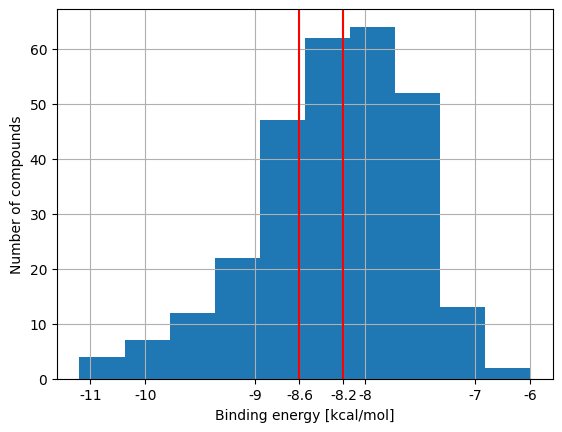

In [11]:
dock_res['Affinity to 1SA0 [kcal/mol]'].hist(bins=10)
#plt.title("Distribution of binarized activity")
#plt.xlim(xmin=-0.5, xmax = 1.5)
x = [-10.5, -10, -9, -8.6, -8.2, -8, -7, -6.5]
labels = [-11, -10, -9, -8.6, -8.2, -8, -7, -6]
plt.xlabel('Binding energy [kcal/mol]')
plt.ylabel('Number of compounds')
plt.axvline(x=-8.6, color='r') #native docked
plt.axvline(x=-8.2, color='r') #colchicine
plt.rc('grid', linestyle="-.", color='black')
plt.grid(True)
plt.xticks(x, labels)
#plt.savefig('distribution_activity.pdf', bbox_inches='tight')
plt.savefig('chirality_binding_energy.pdf', bbox_inches='tight')

In [12]:
in_range = dock_res[dock_res['Affinity to 1SA0 [kcal/mol]'] > -8.6]
in_range = in_range[in_range['Affinity to 1SA0 [kcal/mol]'] < -8.2]

In [13]:
the_same_0 = dock_res[dock_res['Affinity to 1SA0 [kcal/mol]'] == -8.6]
len(the_same_0)

14

In [14]:
the_same_1 = dock_res[dock_res['Affinity to 1SA0 [kcal/mol]'] == -8.2]
len(the_same_1)

15

In [15]:
len(in_range)

47

In [16]:
in_range

,ligand number,Structure,SMILES,SYBA score,A549 [nM],BALB/3T3 [nM],LoVo [nM],LoVo/DX [nM],MCF-7 [nM],RI LoVo,SI BALB3/T3 (A549),SI BALB3/T3 (LoVo),SI BALB3/T3 (LoVo/DX),SI BALB3/T3 (MCF-7),Affinity to 1SA0 [kcal/mol]
2,3,<rdkit.Chem.rdchem.Mol object at 0x0000021E330...,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,74.22,16.404839,39.119200,41.777761,24.143942,9.099151,0.58,2.38,0.94,1.62,4.30,-8.4
9,10,<rdkit.Chem.rdchem.Mol object at 0x0000021E330...,C1N(C(=S)N[C@@H1]2C3=CC(C(NC)=CC=C3C4=C(OC)C(O...,49.88,13.217962,14.260864,9.635175,229.598512,7.928371,23.83,1.08,1.48,0.06,1.80,-8.3
16,17,<rdkit.Chem.rdchem.Mol object at 0x0000021E330...,CC(=O)OC1=CC=C2C3=C(C(OC)=C(C=C3CC[C@@H1](C2=C...,34.35,1681.944585,2890.205397,803.006371,12855.961370,2110.336219,16.01,1.72,3.60,0.22,1.37,-8.4
25,26,<rdkit.Chem.rdchem.Mol object at 0x0000021E330...,CC(=O)N[C@@H1]1C2=CC(C(NC)=CC=C2C3=C(OC)C(OC)=...,25.63,33.218544,18.995642,9.634856,187.241318,57.881645,19.43,0.57,1.97,0.10,0.33,-8.3
28,29,<rdkit.Chem.rdchem.Mol object at 0x0000021E330...,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,27.84,5.536264,11.530736,1.861153,103.052597,8.098140,55.37,2.08,6.20,0.11,1.42,-8.5
31,32,<rdkit.Chem.rdchem.Mol object at 0x0000021E331...,COC1=C(OC)C(OC)=CC=2CC[C@H1](NC(=N)N)C3=CC(=O)...,40.64,6.748411,279.996735,9.635175,16246.471197,5.600000,1686.16,41.49,29.06,0.02,50.00,-8.3
51,52,<rdkit.Chem.rdchem.Mol object at 0x0000021E330...,O=C(O)C=C(C(OCC)=O)N=NN[C@H1]1CCC2=CC(OC)=C(OC...,38.99,982.609443,1238.334197,353.700943,2195.134387,1129.719436,6.21,1.26,3.50,0.56,1.10,-8.5
60,61,<rdkit.Chem.rdchem.Mol object at 0x0000021E330...,OC(=O)C=C(C(OCC)=O)N(NCCC)N[C@H1]1CCC2=CC(OC)=...,45.62,296.687449,475.939825,259.046049,693.847187,101.723846,2.68,1.60,1.84,0.69,4.68,-8.5
69,70,<rdkit.Chem.rdchem.Mol object at 0x0000021E330...,N1(CCCC1)C(=O)OC2=C(OC)C(OC3)=CC=C2C4=CC=C(SC)...,37.14,529.630535,505.849181,253.706239,11735.188746,21.123908,46.26,0.96,1.99,0.04,23.95,-8.5
80,81,<rdkit.Chem.rdchem.Mol object at 0x0000021E330...,O=C(C(C)C)NC(=S)N[C@@H1]1C=2C(C3=C(C(OC)=C(OC)...,92.22,22.340738,7.469565,20.818933,1471.601346,10.474466,70.69,0.33,0.36,0.01,0.71,-8.5


In [17]:
higher_aff = dock_res[dock_res['Affinity to 1SA0 [kcal/mol]'] < -8.6]
len(higher_aff)

78

In [18]:
lower_aff = dock_res[dock_res['Affinity to 1SA0 [kcal/mol]'] > -8.2]
len(lower_aff)

131